In [28]:
#librarires
import keras
import tensorflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 47.6 MB/s 


In [6]:
import pandas as pd
df = pd.read_csv("gas_turbines.csv")

In [7]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
df.drop_duplicates()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [ ]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
col=df.columns[df.dtypes=='object']

In [ ]:
col

Index([], dtype='object')

In [8]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

##  Feature selection

In [9]:
x=df.iloc[:,:3]
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [10]:
y=df["TEY"]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


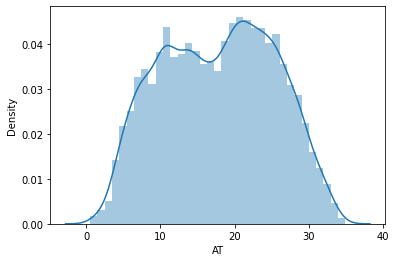

In [11]:
sns.distplot(df.AT)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


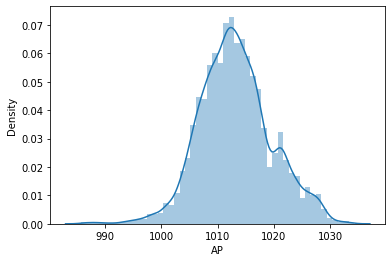

In [12]:
sns.distplot(df.AP)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


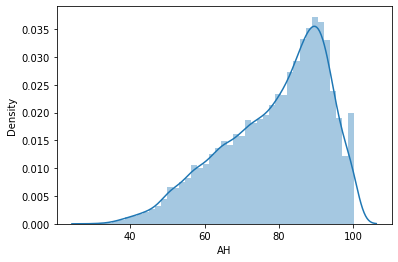

In [13]:
sns.distplot(df.AH)

##  select feature and select

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

##  Train Test split

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)

In [ ]:
#x_train.shape,x_test.shape

((10527, 3), (4512, 3))

In [ ]:
#y_test.shape

(4512,)

In [15]:
x1=x.values

In [16]:
y1=y.values


###   ANN Model

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model=Sequential()
model.add(Dense(units=8,input_dim=3,activation='relu'))
model.add(Dense(units=12,input_dim=8,activation="relu"))
model.add(Dense(units=12,input_dim=12,activation="relu"))
model.add(Dense(units=1,input_dim=12,activation="linear"))

In [19]:
model.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [30]:
 history=model.fit(x1,y1,epochs=100,batch_size=200)

Epoch 1/100
76/76 [==============================] - 0s 1ms/step - loss: 224.2975 - mse: 224.2975
Epoch 2/100
76/76 [==============================] - 0s 1ms/step - loss: 224.3366 - mse: 224.3366
Epoch 3/100
76/76 [==============================] - 0s 1ms/step - loss: 223.7933 - mse: 223.7933
Epoch 4/100
76/76 [==============================] - 0s 1ms/step - loss: 225.0172 - mse: 225.0172
Epoch 5/100
76/76 [==============================] - 0s 1ms/step - loss: 224.1266 - mse: 224.1266
Epoch 6/100
76/76 [==============================] - 0s 1ms/step - loss: 225.6766 - mse: 225.6766
Epoch 7/100
76/76 [==============================] - 0s 1ms/step - loss: 224.8231 - mse: 224.8231
Epoch 8/100
76/76 [==============================] - 0s 1ms/step - loss: 222.9665 - mse: 222.9665
Epoch 9/100
76/76 [==============================] - 0s 1ms/step - loss: 223.4940 - mse: 223.4940
Epoch 10/100
76/76 [==============================] - 0s 1ms/step - loss: 223.0295 - mse: 223.0295
Epoch 11/100
76/76 

In [31]:
model.evaluate(x1,y1)

470/470 [==============================] - 0s 846us/step - loss: 221.3824 - mse: 221.3824


[221.38238525390625, 221.38238525390625]

In [33]:
history.history

{'loss': [224.2975311279297,
  224.33656311035156,
  223.79330444335938,
  225.01718139648438,
  224.12655639648438,
  225.67662048339844,
  224.82305908203125,
  222.9665069580078,
  223.49398803710938,
  223.0294952392578,
  222.28488159179688,
  223.9827880859375,
  223.5020751953125,
  224.8893585205078,
  222.6365509033203,
  222.66278076171875,
  222.7415771484375,
  222.41860961914062,
  222.4770050048828,
  222.7714080810547,
  225.26162719726562,
  223.4634246826172,
  222.7833251953125,
  222.8783721923828,
  224.04327392578125,
  222.68353271484375,
  223.44725036621094,
  222.5776824951172,
  222.89686584472656,
  224.2552032470703,
  223.2135467529297,
  225.5765838623047,
  223.75730895996094,
  222.30235290527344,
  223.32992553710938,
  223.49327087402344,
  222.66651916503906,
  222.5154571533203,
  223.03884887695312,
  222.517333984375,
  223.18106079101562,
  223.40005493164062,
  223.9849395751953,
  223.08938598632812,
  222.9733123779297,
  224.71121215820312,
  

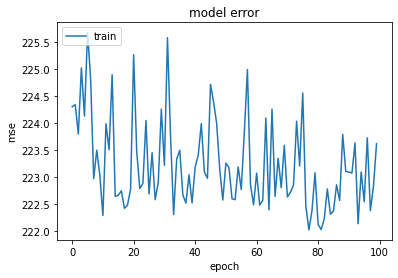

In [36]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
model2=Sequential()
model2.add(Dense(units=8,input_dim=3,activation='relu'))
model2.add(Dense(units=12,input_dim=8,activation="relu"))
model2.add(Dense(units=12,input_dim=8,activation="relu"))
model2.add(Dense(units=12,input_dim=8,activation="relu"))
model2.add(Dense(units=1,input_dim=12,activation="linear"))

In [24]:
model2.compile(optimizer="adam",loss="mse",metrics=["mse"])

In [25]:
model.fit(x1,y1,epochs=150,batch_size=200)

Epoch 1/150
76/76 [==============================] - 1s 8ms/step - loss: 225.3852 - mse: 225.3852
Epoch 2/150
76/76 [==============================] - 0s 1ms/step - loss: 225.3531 - mse: 225.3531
Epoch 3/150
76/76 [==============================] - 0s 1ms/step - loss: 224.5914 - mse: 224.5914
Epoch 4/150
76/76 [==============================] - 0s 1ms/step - loss: 224.0459 - mse: 224.0459
Epoch 5/150
76/76 [==============================] - 0s 1ms/step - loss: 224.2491 - mse: 224.2491
Epoch 6/150
76/76 [==============================] - 0s 1ms/step - loss: 225.0841 - mse: 225.0841
Epoch 7/150
76/76 [==============================] - 0s 1ms/step - loss: 224.9986 - mse: 224.9986
Epoch 8/150
76/76 [==============================] - 0s 1ms/step - loss: 226.6693 - mse: 226.6693
Epoch 9/150
76/76 [==============================] - 0s 1ms/step - loss: 224.6069 - mse: 224.6069
Epoch 10/150
76/76 [==============================] - 0s 1ms/step - loss: 224.8617 - mse: 224.8617
Epoch 11/150
76/76 

In [40]:
model2.evaluate(x1,y1)

470/470 [==============================] - 0s 845us/step - loss: 6031.0918 - mse: 6031.0918


[6031.091796875, 6031.091796875]

In [37]:
model3=Sequential()
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(3,  activation='relu'))
model3.add(Dense(1, activation='linear'))

In [38]:
model3.compile(loss='mean_squared_error', optimizer='adam')

In [39]:
model3.fit(x1, y1, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1008/1008 [==============================] - 3s 2ms/step - loss: 6104.8242 - val_loss: 503.1674
Epoch 2/250
1008/1008 [==============================] - 1s 1ms/step - loss: 504.4197 - val_loss: 401.4412
Epoch 3/250
1008/1008 [==============================] - 2s 2ms/step - loss: 422.3991 - val_loss: 329.4380
Epoch 4/250
1008/1008 [==============================] - 2s 2ms/step - loss: 353.2559 - val_loss: 320.1855
Epoch 5/250
1008/1008 [==============================] - 2s 2ms/step - loss: 302.7438 - val_loss: 266.5311
Epoch 6/250
1008/1008 [==============================] - 1s 1ms/step - loss: 268.7777 - val_loss: 248.1887
Epoch 7/250
1008/1008 [==============================] - 1s 1ms/step - loss: 254.3461 - val_loss: 234.9970
Epoch 8/250
1008/1008 [==============================] - 2s 2ms/step - loss: 238.5070 - val_loss: 242.5364
Epoch 9/250
1008/1008 [==============================] - 2s 2ms/step - loss: 237.7647 - val_loss: 234.4631
Epoch 10/250
1008/1008 [============

In [41]:
model3.evaluate(x1,y1)

470/470 [==============================] - 1s 1ms/step - loss: 217.4020


217.40196228027344

# model3 with 2 hidden layers is best model